In [ ]:
# %pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [1]:
!python3 -m pip install tensorflow[and-cuda]==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install -U tf_keras # Keras 2
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: tf_keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [3]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import LearningRateScheduler
# from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from keras import regularizers

# Read all csv files and combine
## These contain continuous time series data

In [6]:
# df_kicks1 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_I_labelled.csv")
# df_kicks2 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_II_labelled.csv")
# df_kicks3 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_III_labelled.csv")

# df_kicks_test = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_test_labelled.csv")
df_kicks1 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_I_labelled2.csv")
df_kicks2 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_II_labelled2.csv")
df_kicks3 = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_III_labelled2.csv")

df_kicks_test = pd.read_csv("/content/drive/MyDrive/DSS/continuous_kicks_test_labelled2.csv")
all_kicks = pd.concat([df_kicks1, df_kicks2, df_kicks3], axis=0)
all_kicks.reset_index(drop=True, inplace=True)

In [ ]:
all_kicks

,time,ax,ay,az,am,rx,ry,rz,rm,movement
0,0.000005,-0.967285,0.018799,0.232910,0.993857,3.448486,3.631592,-0.671387,5.211005,0
1,0.342938,-0.970947,0.046387,0.266113,1.005671,3.997803,2.105713,-0.457764,4.283998,0
2,0.362382,-0.965332,0.064941,0.248047,0.988421,2.716064,1.892090,0.061035,3.610631,0
3,0.381505,-0.943604,0.056396,0.244385,0.984302,3.997803,2.777100,-0.457764,5.022066,0
4,0.400617,-0.972900,0.059082,0.247803,1.016512,5.950928,1.922607,-1.098633,6.351470,0
...,...,...,...,...,...,...,...,...,...,...
26594,157.276149,-0.977295,0.080566,0.147217,0.988574,0.122070,2.014160,0.732422,2.390522,0
26595,157.293291,-0.972900,0.076416,0.152344,0.991101,0.549316,2.319336,0.579834,2.573086,0
26596,157.310528,-0.988037,0.072998,0.143311,1.001748,0.732422,1.586914,0.427246,1.997911,0
26597,157.327724,-0.974609,0.077637,0.144287,0.985746,1.068115,1.831055,0.274658,2.309880,0


In [21]:
!pip install pandas tflite_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.4 MB/s eta 0:00:00


In [22]:
import tflite_runtime.interpreter as tflite
def z_normalisation(column):
  return (column - column.mean()) / column.std()
i=0
j=0
preds = []
while True:
  subset_df = df_kicks_test.iloc[i:i+300]
  if len(subset_df) < 300:
    break
  X = subset_df.iloc[:, 1:-1]
  X = X.apply(z_normalisation)
  X = X.to_numpy(dtype=np.float32)
  X = X[np.newaxis, :, :]
  TFLITE_FILE_PATH = '/content/drive/MyDrive/saved_model/model.tflite'

  interpreter = tflite.Interpreter(TFLITE_FILE_PATH)
  interpreter.allocate_tensors()

  # Get input and output tensors.
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  # Test the model on random input data.
  input_shape = input_details[0]['shape']
  input_data = X
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()
  output_data = interpreter.get_tensor(output_details[0]['index'])
  # print(output_data)
  label = np.argmax(output_data)
  preds.append(label)

  i += 1
  j += 1
  if j == 300:
    avg = np.bincount(preds).argmax()
    j = 0
    preds = []
    label_mapping = {0: "no kick", 1: "front kick", 2: "low roundhouse kick", 3: "mid roundhouse kick"}
    print(label_mapping[avg])

  # print(i)
  if i == 8991:
    break


no kick
no kick
no kick
low roundhouse kick
no kick
front kick
no kick
front kick
no kick
mid roundhouse kick
low roundhouse kick
no kick
mid roundhouse kick
no kick
mid roundhouse kick
no kick
mid roundhouse kick
no kick
front kick
no kick
low roundhouse kick
no kick
no kick
no kick
front kick
no kick
no kick
no kick


Removing the time column and separating features and labels

In [7]:
zero_indices = all_kicks.index[all_kicks['movement'] == 0].tolist()

num_rows_to_keep = 10000
selected_zero_indices = np.random.choice(zero_indices, size=num_rows_to_keep, replace=False)

# Step 3: Remove rows corresponding to the selected indices
df_filtered = all_kicks.drop(selected_zero_indices)

In [8]:
X = df_filtered.iloc[:, 1:-1]
y = df_filtered.iloc[:, -1]

In [ ]:
testing_x = df_kicks_test.iloc[:, 1:-1]
testing_y = df_kicks_test.iloc[:, -1]

In [9]:

filtered_data = y[y != 0]

# Find segments with the same label
segments = (filtered_data != filtered_data.shift()).cumsum()

# Calculate the length of each segment
segment_lengths = filtered_data.groupby(segments).size()

# Compute the average length of segments with the same label
average_length = segment_lengths.mean()

print("Average length of segments with the same label (excluding label 0):")
print(average_length)
print(len(y))

Average length of segments with the same label (excluding label 0):
290.05555555555554
16599


In [10]:
def z_normalisation(column):
  return (column - column.mean()) / column.std()

In [11]:
X = X.apply(z_normalisation)

In [12]:
def roll_data(x, y, window_len, step=1):
    out_len = x.shape[0] - (window_len - 1)
    retval = np.zeros((out_len, window_len, x.shape[1]))
    for c in range(window_len):
        retval[:out_len, c, :] = x[c : c + out_len, :]
    return retval, y[window_len - 1 :]

In [13]:
retval, y = roll_data(X.to_numpy(),y.to_numpy(),300)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([6050, 3290, 3480, 3480]))

In [ ]:
y.shape

(26170,)

In [ ]:
retval.shape

(26170, 430, 8)

In [14]:
# from sklearn.model_selection import train_test_split
import tensorflow as tf
# Split the features and output into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(retval, y, test_size=0.2, random_state=42)
train_size = int(0.7 * len(retval))
X_train, X_test = retval[:train_size], retval[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# Verify the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11410, 300, 8)
X_test shape: (4890, 300, 8)
y_train shape: (11410,)
y_test shape: (4890,)


In [ ]:
np.unique(y_train,return_counts=True)
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3]), array([1871, 1161,  929,  929]))

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Test with basic model

In [16]:
import keras
import os
model = Sequential([
      Input(shape=(300, 8)),
      Flatten(),
      Dense(64, activation='relu'),
      Dense(4, activation='softmax')
  ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=16,
                    validation_data=(X_test, y_test))


test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# keras.utils.plot_model(model, show_shapes=True)

save_path = "support_model"
if not os.path.exists(save_path):
    os.mkdir(save_path)

tf.saved_model.save(model,save_path)

print(f"Loading saved model from {save_path} and creating converter")

Epoch 1/2
714/714 [==============================] - 6s 6ms/step - loss: 0.8005 - accuracy: 0.6872 - val_loss: 1.4848 - val_accuracy: 0.5789
Epoch 2/2
153/153 [==============================] - 0s 2ms/step - loss: 1.9983 - accuracy: 0.5804
Test Loss: 1.9982740879058838
Test Accuracy: 0.5803681015968323
Loading saved model from support_model and creating converter


In [17]:
save_path = '/content/support_model'
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)

#converter = tf.lite.TFLiteConverter.from_keras_model(model)


print("Calling converter.convert()")
tflite_model = converter.convert()
print("Writing output")
with open(os.path.join("/content/support_model", 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Calling converter.convert()
Writing output


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import LearningRateScheduler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from keras import regularizers

# Final Model

In [18]:
import keras

def lr_schedule(epoch):
    initial_lr = 0.0001
    decay_factor = 0.1

    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * (decay_factor ** (epoch // 10))

lr_scheduler = LearningRateScheduler(lr_schedule)

model = Sequential([
    Input(shape=(300, 8), name="input_layer"),
    Flatten(name="flatten_layer"),
    Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(4.0), kernel_regularizer=regularizers.l2(0.01), name="dense_layer"),#
    Dropout(0.1, name="dropout_layer"),
    Dense(4, activation='softmax', kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01),  name="output_layer")#
])
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.2)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

seed = 7
tf.random.set_seed(seed)

history = model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=20,
    validation_split=0.2,
    verbose=1,
    callbacks=[lr_scheduler]
)

# history = model.fit(X_train, y_train,
#                     epochs=20,
#                     batch_size=25,
#                     validation_data=(X_test, y_test))#,callbacks=[lr_scheduler]

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

save_path = "support_model"
if not os.path.exists(save_path):
    os.mkdir(save_path)

tf.saved_model.save(model,save_path)

print(f"Loading saved model from {save_path} and creating converter")

Epoch 1/20
1141/1141 [==============================] - 10s 5ms/step - loss: 2.2930 - accuracy: 0.5741 - val_loss: 2.3471 - val_accuracy: 0.4825 - lr: 1.0000e-04
Epoch 2/20
1141/1141 [==============================] - 4s 4ms/step - loss: 1.6770 - accuracy: 0.7438 - val_loss: 2.1585 - val_accuracy: 0.4969 - lr: 1.0000e-04
Epoch 3/20
1141/1141 [==============================] - 4s 4ms/step - loss: 1.3623 - accuracy: 0.8231 - val_loss: 2.1809 - val_accuracy: 0.4851 - lr: 1.0000e-04
Epoch 4/20
1141/1141 [==============================] - 5s 5ms/step - loss: 1.1250 - accuracy: 0.8781 - val_loss: 2.0487 - val_accuracy: 0.4768 - lr: 1.0000e-04
Epoch 5/20
1141/1141 [==============================] - 4s 3ms/step - loss: 0.9450 - accuracy: 0.9167 - val_loss: 2.0131 - val_accuracy: 0.4877 - lr: 1.0000e-04
Epoch 6/20
1141/1141 [==============================] - 4s 4ms/step - loss: 0.7975 - accuracy: 0.9452 - val_loss: 1.9669 - val_accuracy: 0.5061 - lr: 1.0000e-04
Epoch 7/20
1141/1141 [===========

In [19]:
import tensorflow as tf
save_path = '/content/support_model'
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)

#converter = tf.lite.TFLiteConverter.from_keras_model(model)


print("Calling converter.convert()")
tflite_model = converter.convert()
print("Writing output")
with open(os.path.join("/content/drive/MyDrive/saved_model", 'model.tflite'), 'wb') as f:
    f.write(tflite_model)

Calling converter.convert()
Writing output


153/153 [==============================] - 1s 2ms/step


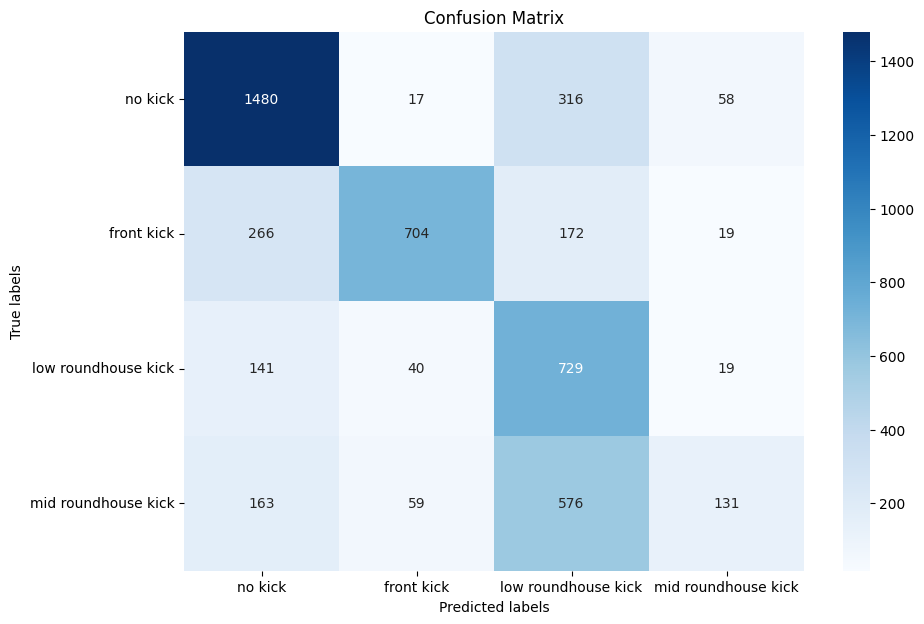

In [23]:
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
label_mapping = {0: "no kick", 1: "front kick", 2: "low roundhouse kick", 3: "mid roundhouse kick"}
label_mapping_str = {idx: label_mapping[label] for idx, label in enumerate(range(len(cm)))}


cm_df = pd.DataFrame(cm, index=label_mapping.values(), columns=label_mapping.values())

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import classification_report


y_pred = np.argmax(model.predict(X_test), axis=1)

class_names = ["no kick", "front kick", "low roundhouse kick", "mid roundhouse kick"]
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

print("Classification Report:")
print(report)

153/153 [==============================] - 1s 5ms/step
Classification Report:
{'no kick': {'precision': 0.7219512195121951, 'recall': 0.7910208444681989, 'f1-score': 0.7549094618719714, 'support': 1871}, 'front kick': {'precision': 0.8585365853658536, 'recall': 0.6063738156761412, 'f1-score': 0.7107521453811206, 'support': 1161}, 'low roundhouse kick': {'precision': 0.40658114891243724, 'recall': 0.7847147470398278, 'f1-score': 0.5356355620867009, 'support': 929}, 'mid roundhouse kick': {'precision': 0.5770925110132159, 'recall': 0.14101184068891282, 'f1-score': 0.22664359861591699, 'support': 929}, 'accuracy': 0.6224948875255624, 'macro avg': {'precision': 0.6410403662009254, 'recall': 0.5807803119682702, 'f1-score': 0.5569851919889275, 'support': 4890}, 'weighted avg': {'precision': 0.6669457131672811, 'recall': 0.6224948875255624, 'f1-score': 0.6024082176365382, 'support': 4890}}


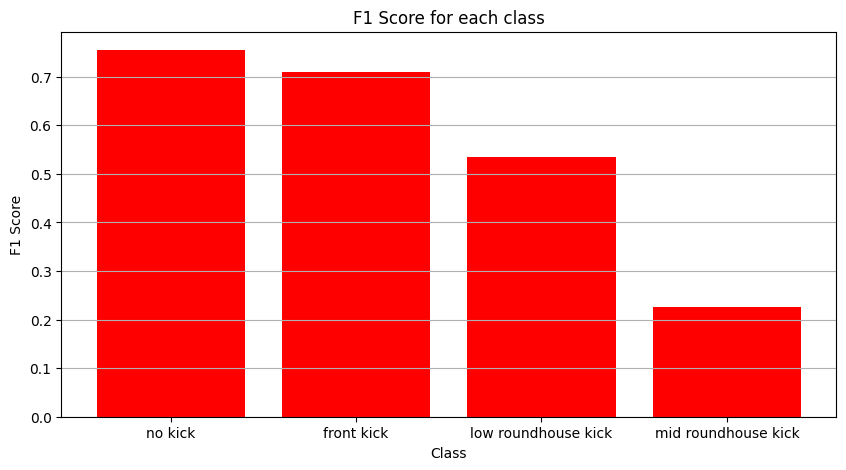

In [25]:
f1_scores = [report[str(class_name)]['f1-score'] for class_name in class_names]

f1_scores_array = np.array(f1_scores)

plt.figure(figsize=(10, 5))
plt.bar(range(len(f1_scores_array)), f1_scores_array, color='red')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class')
plt.xticks(range(len(f1_scores_array)), label_mapping.values())
plt.grid(axis='y')
plt.show()

In [39]:
model = Sequential([
  Input(shape=(300, 8), name="input_layer"),
  Flatten(name="flatten_layer"),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(4.0), kernel_regularizer=regularizers.l2(0.01), name="dense_layer"),
  Dropout(0.1, name="dropout_layer"),
  Dense(4, activation='softmax', kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01),  name="output_layer"),
  ])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 2400)              0         
                                                                 
 dense_layer (Dense)         (None, 64)                153664    
                                                                 
 dropout_layer (Dropout)     (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 4)                 260       
                                                                 
Total params: 153924 (601.27 KB)
Trainable params: 153924 (601.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def lr_schedule(epoch):
#     initial_lr = 0.001
#     decay_factor = 0.1

#     if epoch < 20:
#         return initial_lr
#     else:
#         return initial_lr * (decay_factor ** (epoch // 10))

# lr_scheduler = LearningRateScheduler(lr_schedule)

# model = Sequential([
#     Flatten(input_shape=(5, 8)),
#     Dense(64, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(4, activation='softmax')
# ])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


# history = model.fit(X_train, y_train,
#                     epochs=30,
#                     batch_size=16,
#                     validation_data=(X_test, y_test),
#                     callbacks=[lr_scheduler])


# test_loss, test_accuracy = model.evaluate(X_test, y_test)

# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Input
# from tensorflow.keras.callbacks import LearningRateScheduler
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.optimizers import Adam

# def lr_schedule(epoch):
#     initial_lr = 0.001
#     decay_factor = 0.1

#     if epoch < 20:
#         return initial_lr
#     else:
#         return initial_lr * (decay_factor ** (epoch // 10))

# lr_scheduler = LearningRateScheduler(lr_schedule)

